In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from kjm2601 import obsidian_media_path as path

In [27]:
def compute_fourier_transform(L_list, n_list, k_max, dk):
    assert len(L_list) == len(n_list)
    nx = 4096
    k = np.arange(-k_max, k_max+dk, dk)
    psi_hat = np.zeros((len(k), len(n_list)), dtype=complex)
    for i,n in enumerate(n_list):
        L = L_list[i]
        x = np.linspace(0, L, nx)
        psi = np.sin(n*np.pi*x/L) * np.sqrt(2/L)
        integrand = psi[:,None] * np.exp(-1j*k[None,:]*x[:,None]) / np.sqrt(2*np.pi)
        psi_hat[:,i] = np.trapz(integrand, x, axis=0)
        
    return k, psi_hat


In [28]:
E = 10
predicted_k = (2*E)**0.5
n_list = [1, 2, 10, 50]
L_list = (0.5*np.array(n_list)**2 * np.pi**2 / E) ** 0.5
L = 10
k_max = 10
dk = 0.01
k, psi_hat = compute_fourier_transform(L_list, n_list, k_max, dk)    



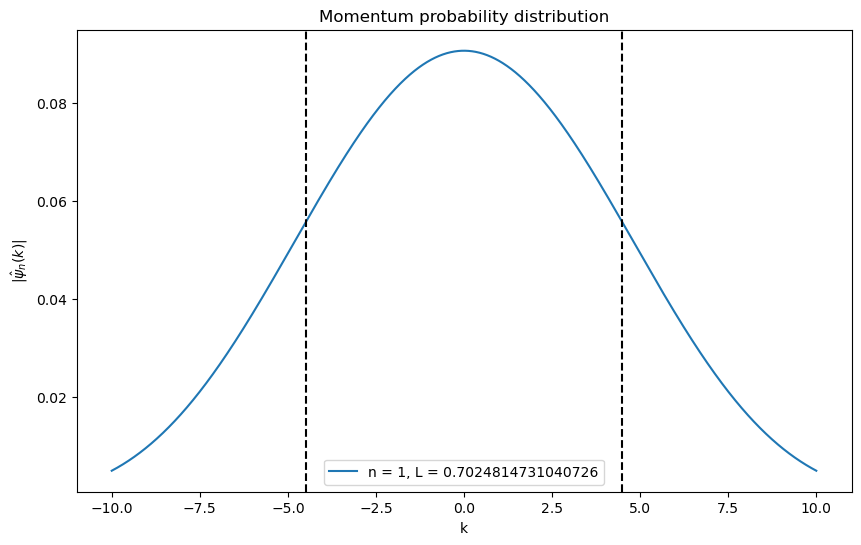

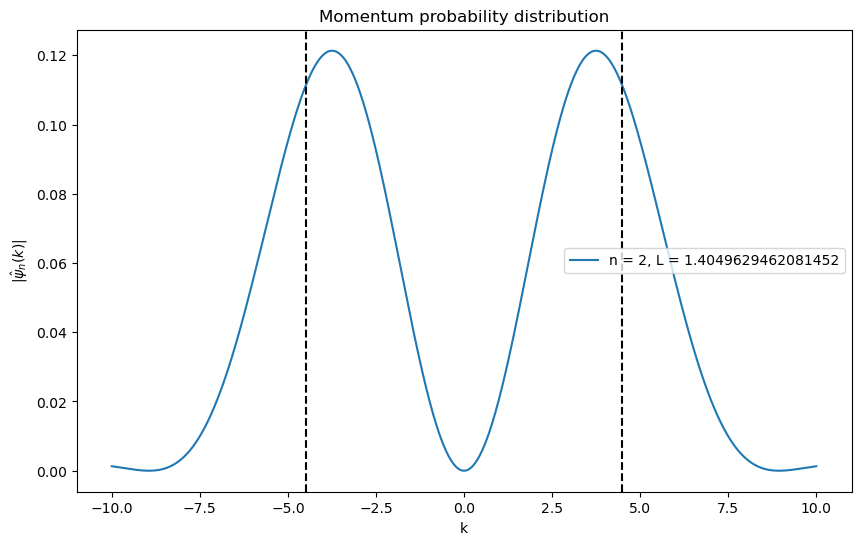

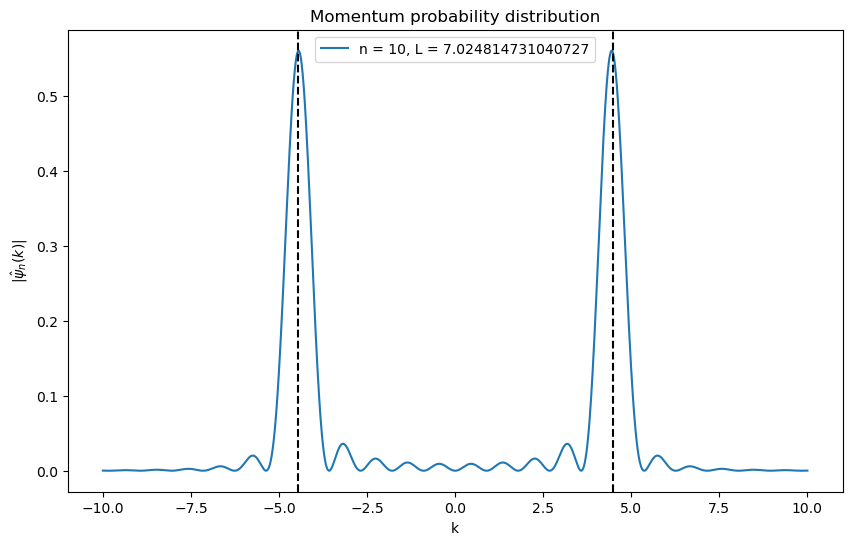

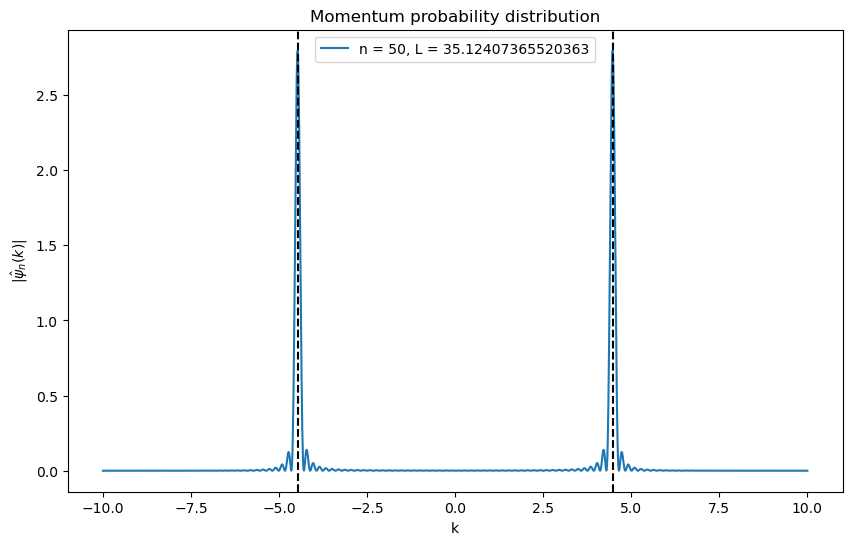

In [32]:
for i,n in enumerate(n_list):
    plt.figure(figsize=(10,6))
    L = L_list[i]
    plt.plot(k, np.abs(psi_hat[:,i])**2, label=f'n = {n}, L = {L}')
    plt.xlabel('k')
    plt.ylabel(r'$|\hat{\psi}_n(k)|$')
    plt.axvline(predicted_k, color='k', linestyle='--')
    plt.axvline(-predicted_k, color='k', linestyle='--')
    plt.legend()
    plt.title('Momentum probability distribution')
    fname = path + f'lecture6_momentum_probability distribution_{n}.pdf'
    plt.savefig(fname)
    plt.show()
